<a href="https://colab.research.google.com/github/Nikhilagg2384/html-portfolio/blob/main/rainfall_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Rainfall.csv to Rainfall.csv


In [3]:
import pandas as pd
df = pd.read_csv('Rainfall.csv')

In [4]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [6]:
df.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


In [7]:
display(df.columns)
df.columns = df.columns.str.strip()
display(df.columns)

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [8]:
df = df.drop(columns='day')

In [9]:
df.winddirection=df.winddirection.fillna(df['winddirection'].mode()[0])
df.windspeed=df.windspeed.fillna(df['windspeed'].median())

In [10]:
df.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0
winddirection,0


In [11]:
df['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [12]:
df['rainfall']=df['rainfall'].map({"yes":1,"no":0})

In [13]:
df.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [14]:
df.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

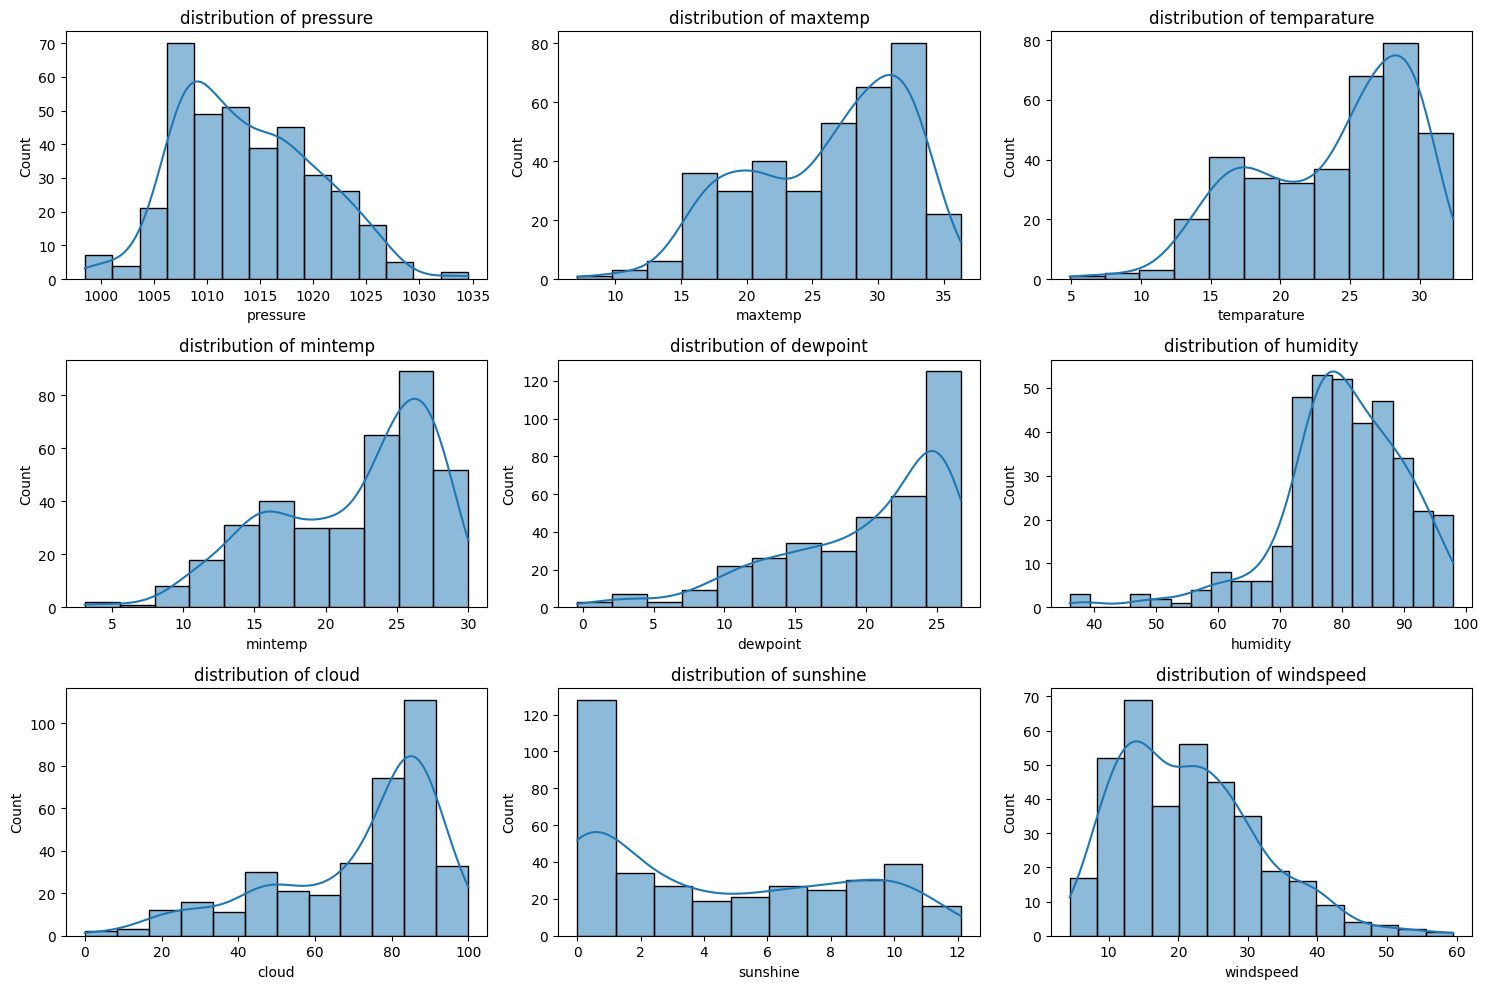

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'windspeed'],1):
  plt.subplot(3,3,i)
  sns.histplot(df[column],kde=True)
  plt.title(f"distribution of {column}")

plt.tight_layout()
plt.show()

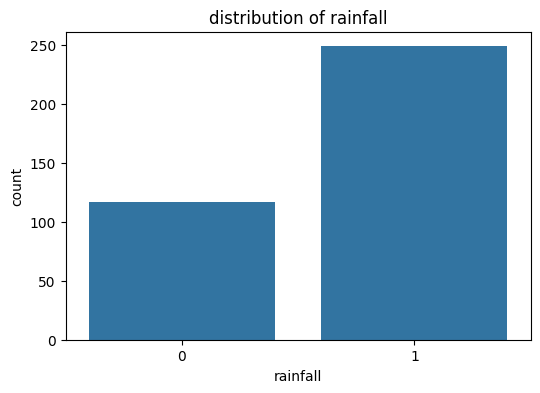

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='rainfall',data= df)
plt.title("distribution of rainfall")
plt.show()

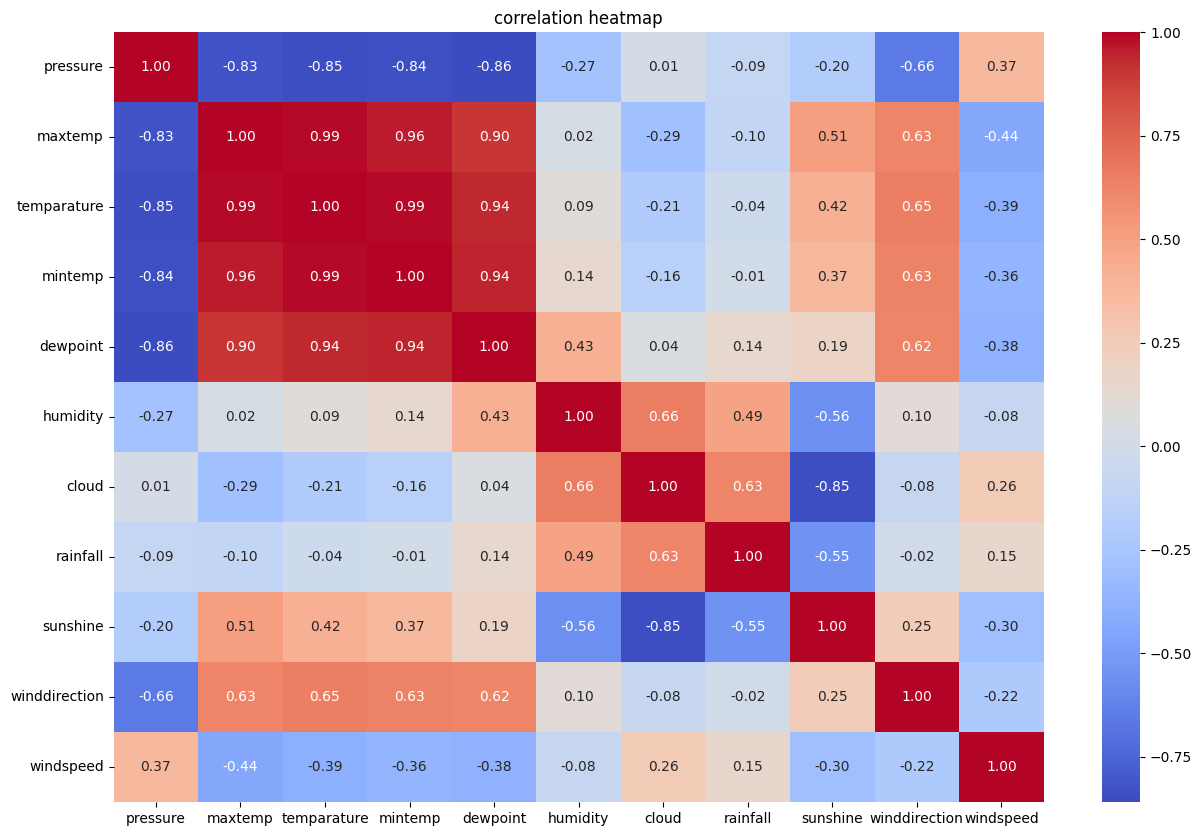

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.title("correlation heatmap")
plt.show()

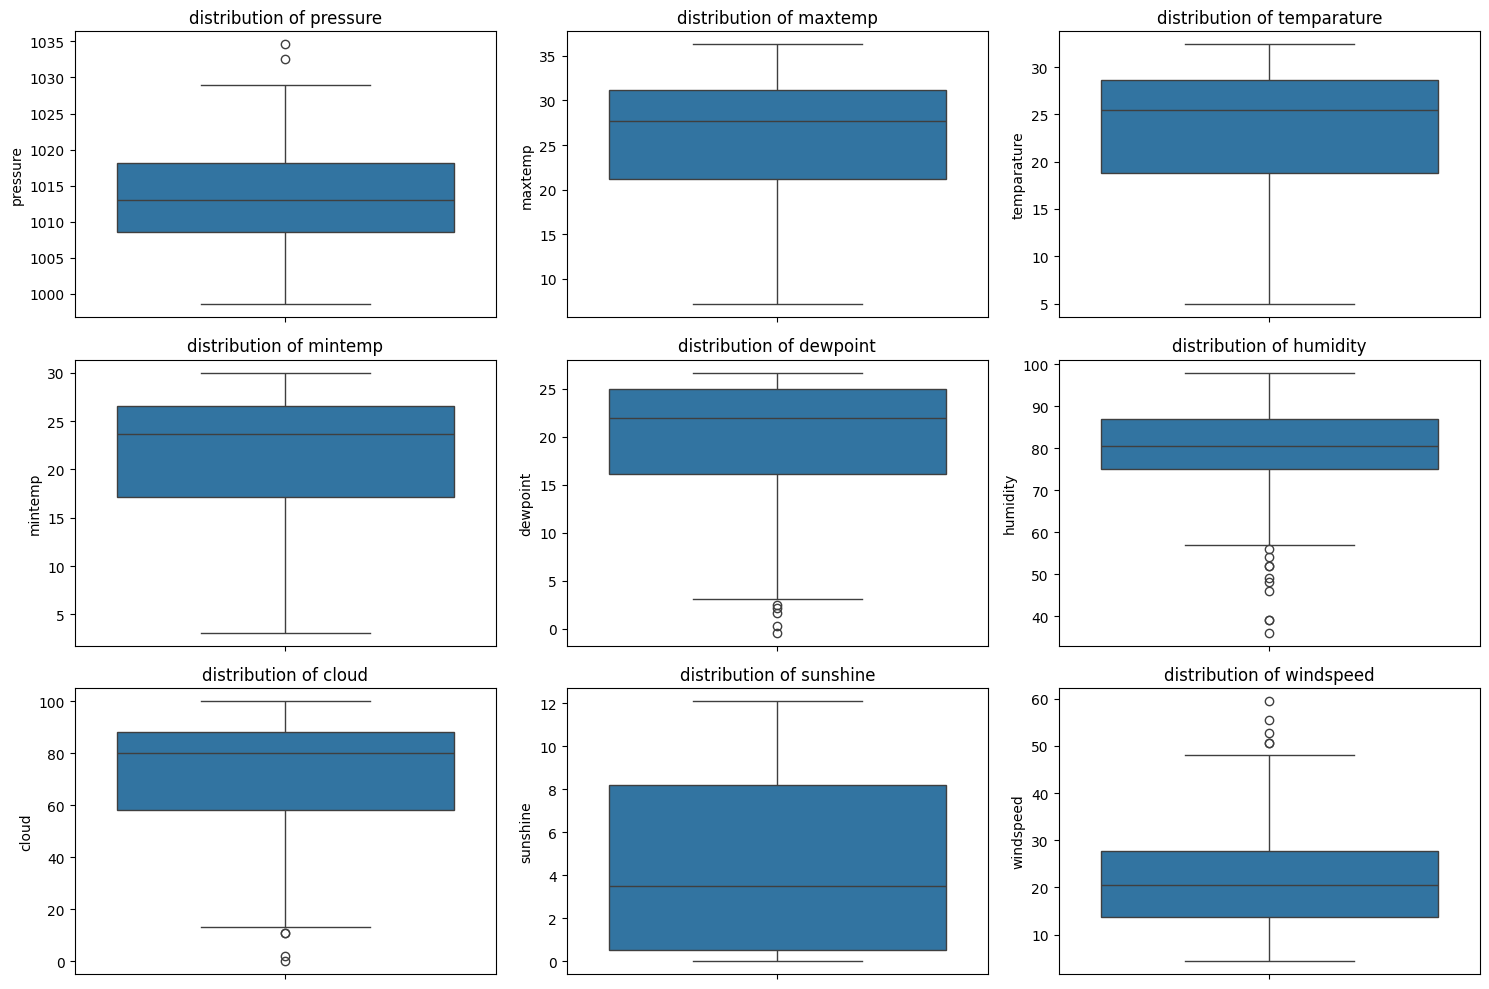

In [18]:
plt.figure(figsize=(15,10))
for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'windspeed'],1):
  plt.subplot(3,3,i)
  sns.boxplot(df[column])
  plt.title(f"distribution of {column}")

plt.tight_layout()
plt.show()

In [19]:

df = df.drop(columns=['maxtemp','mintemp','temparature'])

In [20]:
df['rainfall'].value_counts()

,count
rainfall,
1,249
0,117


In [21]:
df_maj=df[df['rainfall']==1]
df_min=df[df['rainfall']==0]

In [22]:
df_min.shape

(117, 8)

In [23]:
from sklearn.utils import resample
df_maj_new= resample(df_maj,replace=True,n_samples=len(df_min),random_state=42)

In [24]:
df_maj_new.shape

(117, 8)

In [25]:
df_new= pd.concat([df_maj_new,df_min])

In [26]:
df_new.shape

(234, 8)

In [27]:
df_new= df_new.sample(frac=1,random_state=42).reset_index(drop="true")

In [28]:
df_new.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1011.4,23.9,86,84,1,3.1,220.0,11.8
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1005.3,26.3,79,86,1,1.6,210.0,29.3
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [29]:
x=df_new.drop(columns=['rainfall'])
print(x)

     pressure  dewpoint  humidity  cloud  sunshine  winddirection  windspeed
0      1011.4      23.9        86     84       3.1          220.0       11.8
1      1013.4      19.5        69     17      10.5           70.0       12.4
2      1006.1      24.4        74     27      10.8          220.0        8.7
3      1005.3      26.3        79     86       1.6          210.0       29.3
4      1021.2       8.4        66     18      10.1           20.0       24.4
..        ...       ...       ...    ...       ...            ...        ...
229    1019.0      16.8        67     88       0.0           50.0       28.2
230    1011.5      20.9        92     90       0.5           50.0       23.7
231    1014.7      17.4        91     96       0.0           50.0       28.0
232    1008.3      24.1        74     29       5.7           10.0        4.4
233    1017.7      15.3        95    100       0.0           50.0       26.2

[234 rows x 7 columns]


In [30]:
y= df_new['rainfall']
print(y)

0      1
1      0
2      0
3      1
4      0
      ..
229    1
230    1
231    1
232    0
233    1
Name: rainfall, Length: 234, dtype: int64


In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

rf_model=RandomForestClassifier(random_state=42)
param_grid_rf={
    "n_estimators": [50,100,200],
    "max_features": ["sqrt","log2"],
    "max_depth":[None,10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [33]:
print(df_new.head())

   pressure  dewpoint  humidity  cloud  rainfall  sunshine  winddirection  \
0    1011.4      23.9        86     84         1       3.1          220.0   
1    1013.4      19.5        69     17         0      10.5           70.0   
2    1006.1      24.4        74     27         0      10.8          220.0   
3    1005.3      26.3        79     86         1       1.6          210.0   
4    1021.2       8.4        66     18         0      10.1           20.0   

   windspeed  
0       11.8  
1       12.4  
2        8.7  
3       29.3  
4       24.4  


In [34]:
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

grid_search_rf.fit(x_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [35]:
best_rf_model = grid_search_rf.best_estimator_

print("best parameters for Random Forest:", grid_search_rf.best_params_)

best parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [36]:
import numpy as np
cv_scores = cross_val_score(best_rf_model, x_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.73684211 0.78947368 0.83783784 0.86486486 0.89189189]
Mean cross-validation score: 0.8241820768136557


In [37]:
y_pred = best_rf_model.predict(x_test)

print("Test set Accuracy:", accuracy_score(y_test, y_pred))
print("Test set Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test set Accuracy: 0.7446808510638298
Test set Confusion Matrix:
 [[15  9]
 [ 3 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.62      0.71        24
           1       0.69      0.87      0.77        23

    accuracy                           0.74        47
   macro avg       0.76      0.75      0.74        47
weighted avg       0.76      0.74      0.74        47



In [38]:
input_data = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)

input_df = pd.DataFrame([input_data], columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine','winddirection', 'windspeed'])

In [39]:
prediction = best_rf_model.predict(input_df)
print("Prediction result:", "Rainfall" if prediction[0] == 1 else "No Rainfall")

Prediction result: Rainfall


In [40]:
import pickle
import pandas as pd

model_data = {"model": best_rf_model, "feature_names": x.columns.tolist()}

with open("rainfall_prediction_model.pkl", "wb") as file:
  pickle.dump(model_data, file)